<h1>Modelos Lineales con Entradas Vectoriales</h1>

Usaremos el banco de datos usado por Fisher en su propuesta de clasificador.
<p>Link: http://archive.ics.uci.edu/ml/datasets/iris</p>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df_original = pd.read_csv("irisdata.csv",sep=";")

In [3]:
df_original.head()

sepal length  sepal width  petal length  petal width        class
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa

In [4]:
df_original["class"].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

Seleccionamos solo dos características del dataset <b>petal length</b>, <b>sepal width</b> y dos clases <b>Iris-setosa</b>, <b>Iris-virginica</b>.

In [5]:
df = df_original.loc[df_original['class'].str.contains('Iris-setosa|Iris-virginica')]
df = df.drop(columns=["petal length","sepal width"])
df["class"].loc[df["class"] == "Iris-setosa"] = 0
df["class"].loc[df["class"] == "Iris-virginica"] = 1

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [6]:
n_classes = 2
plot_step = 0.02
plot_colors = "rb"
target_names = ['Iris-setosa','Iris-virginica']

plt.figure()

X = df.values
y = df["class"].values

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                        np.arange(y_min, y_max, plot_step))
plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=3)

# Plot the training points
for i, color in zip(range(n_classes), plot_colors):
    idx = np.where(y == i)
    plt.scatter(X[idx, 0], X[idx, 1], c=color, label=target_names[i],
                cmap=plt.cm.RdYlBu, edgecolor='black', s=15)


plt.suptitle("Iris-setosa vs Iris-virginica")
plt.legend(loc='lower right', borderpad=0, handletextpad=0)
plt.axis("tight")

(4.1134459112943755,
 8.090387306043075,
 -0.029604796048677468,
 2.625771647815634)

<h1>Regresión Lineal</h1>

<h2>Calculamos la matriz covarianza de los datos en $S$</h2>

$S=\{(x_{1n},x_{2n}):x_{1n}\in X_1,x_{2n}\in X_2\},\,\,\forall n=1,\cdots,N$

$X_1:$ "petal length"
$X_2:$ "sepal width"

Sea $\phi(x)=(1,x_1,x_2)$

$\phi(\mathbf{X})\phi(\mathbf{X})^{\intercal} = 
\begin{bmatrix} 
1 & 1& \cdots & 1 \\
\phi(x_{11}) & \phi(x_{12}) & \cdots & \phi(x_{1N}) \\ 
\phi(x_{21}) & \phi(x_{22}) & \cdots & \phi(x_{2N})
\end{bmatrix}
\begin{bmatrix} 
1 & \phi(x_{11}) & \phi(x_{21}) \\
1 & \phi(x_{12})& \phi(x_{22})  \\ 
\vdots & \vdots & \vdots \\
1 & \phi(x_{1N}) & \phi(x_{2N})
\end{bmatrix}$


In [7]:
X[:,0:2]
phi = np.zeros((len(X),3))

#Mapeamos cada datos de S con la función phi (1,x1,x2)
for n,i,j in zip(range(len(X)),X[:,0],X[:,1]):
    phi[n] = [1,i,j]

phit = np.transpose(phi)
S = np.matmul(phit,phi)

In [8]:
S

array([[ 100.  ,  579.7 ,  113.5 ],
       [ 579.7 , 3448.99,  731.36],
       [ 113.5 ,  731.36,  212.47]])

<h2>Calculamos los $w$</h2>

$w=S^{-1}\sum_{n=1}^{N}y_{n}\phi(x_n)$

In [9]:
Sinv = np.linalg.inv(S)
Sinv 

array([[ 0.98340886, -0.19954181,  0.16152866],
       [-0.19954181,  0.04156221, -0.03647075],
       [ 0.16152866, -0.03647075,  0.04395793]])

In [10]:
yphi = np.zeros(3)
yphi.shape
for n in range(len(y)):
    yphi = yphi + phit[:,n] * y[n]

In [11]:
w = np.matmul(Sinv,yphi)

In [12]:
plt.figure()

X = df.values
y = df["class"].values

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                        np.arange(y_min, y_max, plot_step))
plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=3)

# Plot the training points
for i, color in zip(range(n_classes), plot_colors):
    idx = np.where(y == i)
    plt.scatter(X[idx, 0], X[idx, 1], c=color, label=target_names[i],
                cmap=plt.cm.RdYlBu, edgecolor='black', s=15)

plt.plot(X[:,0],(0.5-w[0]-X[:,0]*w[1])/w[2],color='green')

plt.suptitle("Iris-setosa vs Iris-virginica")
plt.legend(loc='lower right', borderpad=0, handletextpad=0)
plt.axis("tight")

(4.1134459112943755,
 8.090387306043075,
 -0.029604796048677468,
 2.625771647815634)

In [13]:
df_original["class"].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [14]:
df = df_original.loc[df_original['class'].str.contains('Iris-versicolor|Iris-virginica')]
df = df.drop(columns=["sepal length","sepal width"])
df["class"].loc[df["class"] == "Iris-versicolor"] = 0
df["class"].loc[df["class"] == "Iris-virginica"] = 1

(2.798255038459213, 7.109395635581486, 0.9152482571494174, 2.583857530655638)

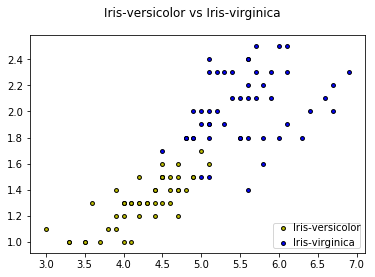

In [15]:
n_classes = 2
plot_step = 0.02
plot_colors = "yb"
target_names = ['Iris-versicolor','Iris-virginica']

plt.figure()

X = df.values
y = df["class"].values

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                        np.arange(y_min, y_max, plot_step))
plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=3)

# Plot the training points
for i, color in zip(range(n_classes), plot_colors):
    idx = np.where(y == i)
    plt.scatter(X[idx, 0], X[idx, 1], c=color, label=target_names[i],
                cmap=plt.cm.RdYlBu, edgecolor='black', s=15)

plt.suptitle("Iris-versicolor vs Iris-virginica")
plt.legend(loc='lower right', borderpad=0, handletextpad=0)
plt.axis("tight")

In [16]:
X[:,0:2]
phi = np.zeros((len(X),3))

for n,i,j in zip(range(len(X)),X[:,0],X[:,1]):
    phi[n] = [1,i,j]

phit = np.transpose(phi)
S = np.matmul(phit,phi)

In [17]:
S

array([[ 100.  ,  490.6 ,  167.6 ],
       [ 490.6 , 2474.36,  850.83],
       [ 167.6 ,  850.83,  298.76]])

In [18]:
Sinv = np.linalg.inv(S)
Sinv 

array([[ 0.3948278 , -0.10232657,  0.06992026],
       [-0.10232657,  0.04601073, -0.07362891],
       [ 0.06992026, -0.07362891,  0.17380857]])

In [19]:
yphi = np.zeros(3)
yphi.shape
for n in range(len(y)):
    yphi = yphi + phit[:,n] * y[n]

In [20]:
w = np.matmul(Sinv,yphi)

(2.798255038459213, 7.109395635581486, 0.9152482571494174, 2.583857530655638)

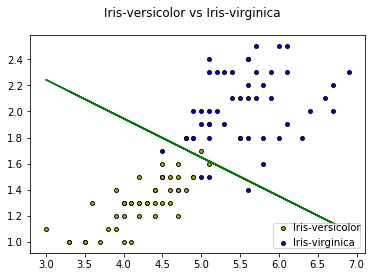

In [21]:
plt.figure()

X = df.values
y = df["class"].values

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                        np.arange(y_min, y_max, plot_step))
plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=3)

# Plot the training points
for i, color in zip(range(n_classes), plot_colors):
    idx = np.where(y == i)
    plt.scatter(X[idx, 0], X[idx, 1], c=color, label=target_names[i],
                cmap=plt.cm.RdYlBu, edgecolor='black', s=15)

plt.plot(X[:,0],(0.5-w[0]-w[1]*X[:,0])/w[2],color='green')

plt.suptitle("Iris-versicolor vs Iris-virginica")
plt.legend(loc='lower right', borderpad=0, handletextpad=0)
plt.axis("tight")

<h1>Regresión Logística</h1>

In [22]:
df = df_original.loc[df_original['class'].str.contains('Iris-setosa|Iris-virginica')]
df = df.drop(columns=["petal length","sepal width"])
df["class"].loc[df["class"] == "Iris-setosa"] = 0
df["class"].loc[df["class"] == "Iris-virginica"] = 1

In [23]:
# Importamos los módulos requeridos
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

#Removiendo las características BAD,JOB,REASON del conjunto de características de entrada
y = df["class"]
x_basic = df.drop(columns=["class"])


#Dividiendo los datos en conjuntos de prueba y entrenamiento
logreg_basic = LogisticRegression()

#Entrenando el modelo básico de regresión logística con el conjunto de entrenamiento
logreg_basic.fit(x_basic,y)

# Imprimiendo los coeficientes
print("intercept ")
print(logreg_basic.intercept_)
print("")
print("coefficients ")
print(logreg_basic.coef_)

#Prediciendo el output de los casos de prueba usando el modelo creado antes
y_pre = logreg_basic.predict(x_basic)

intercept 
[-0.95755211]

coefficients 
[[-0.5160055   3.77249368]]


/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


(4.1134459112943755,
 8.090387306043075,
 -0.029604796048677468,
 2.625771647815634)

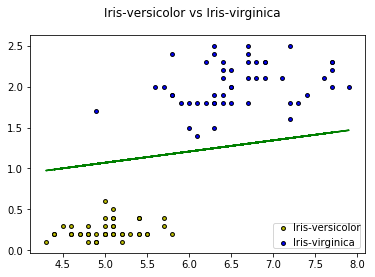

In [24]:
plt.figure()

X = x_basic.values
y = df["class"].values

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                        np.arange(y_min, y_max, plot_step))
plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=3)

# Plot the training points
for i, color in zip(range(n_classes), plot_colors):
    idx = np.where(y == i)
    plt.scatter(X[idx, 0], X[idx, 1], c=color, label=target_names[i],
                cmap=plt.cm.RdYlBu, edgecolor='black', s=15)

plt.plot(X[:,0],(0.5-logreg_basic.intercept_[0]-logreg_basic.coef_[:,0]*X[:,0])/logreg_basic.coef_[:,1],color='green')
#plt.plot((0.5-logreg_basic.intercept_[0]-logreg_basic.coef_[:,1]*X[:,1])/logreg_basic.coef_[:,0],X[:,1],color='green')

plt.suptitle("Iris-versicolor vs Iris-virginica")
plt.legend(loc='lower right', borderpad=0, handletextpad=0)
plt.axis("tight")

<h1>Función Logit o Función Logista Sigmoid</h1>

(-5.565176624190784,
 5.465179356102204,
 -0.06099084611475129,
 1.0609914184224682)

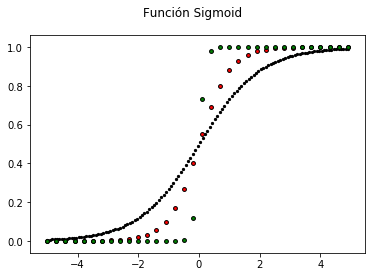

In [25]:
plt.figure()

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                        np.arange(y_min, y_max, plot_step))
plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=3)

for x in np.arange(-5, 5, 0.08):
    y = 1/(1+np.exp(-1*x))
    plt.scatter(x, y,c='k',
                cmap=plt.cm.RdYlBu, edgecolor='black', s=5)
    
for x in np.arange(-5, 5, 0.3):
    y = 1/(1+np.exp(-2*x))
    plt.scatter(x, y, c='r',
                cmap=plt.cm.RdYlBu, edgecolor='black', s=15)

for x in np.arange(-5, 5, 0.3):
    y = 1/(1+np.exp(-10*x))
    plt.scatter(x, y, c='g',
                cmap=plt.cm.RdYlBu, edgecolor='black', s=15)

plt.suptitle("Función Sigmoid")
plt.axis("tight")

$$p(c|x)=f(\mathbf{x}^{\intercal}\mathbf{w})=\frac{1}{1+e^{(\mathbf{x}^{\intercal}\mathbf{w})}}$$